In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
# --- 1. Load the Dataset ---
# Ensure 'philippines_typhoon_monthly_2014_2024.csv' is in the same folder as this script.
try:
    df = pd.read_csv('philippines_typhoon_monthly_2014_2024.csv')
    print("Typhoon dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'philippines_typhoon_monthly_2014_2024.csv' not found.")
    print("Please make sure the dataset file is in the correct directory.")
    exit()


Typhoon dataset loaded successfully.


In [3]:
# --- 2. Define Variables ---
# Define the dependent variable (DV) and independent variables (IVs).
dependent_var = 'Number_of_Typhoons'
independent_vars_all = ['Western_Pacific_SST', 'Vertical_Wind_Shear', 'Midlevel_Humidity']



Generating scatter plots...
Generating scatter plots...


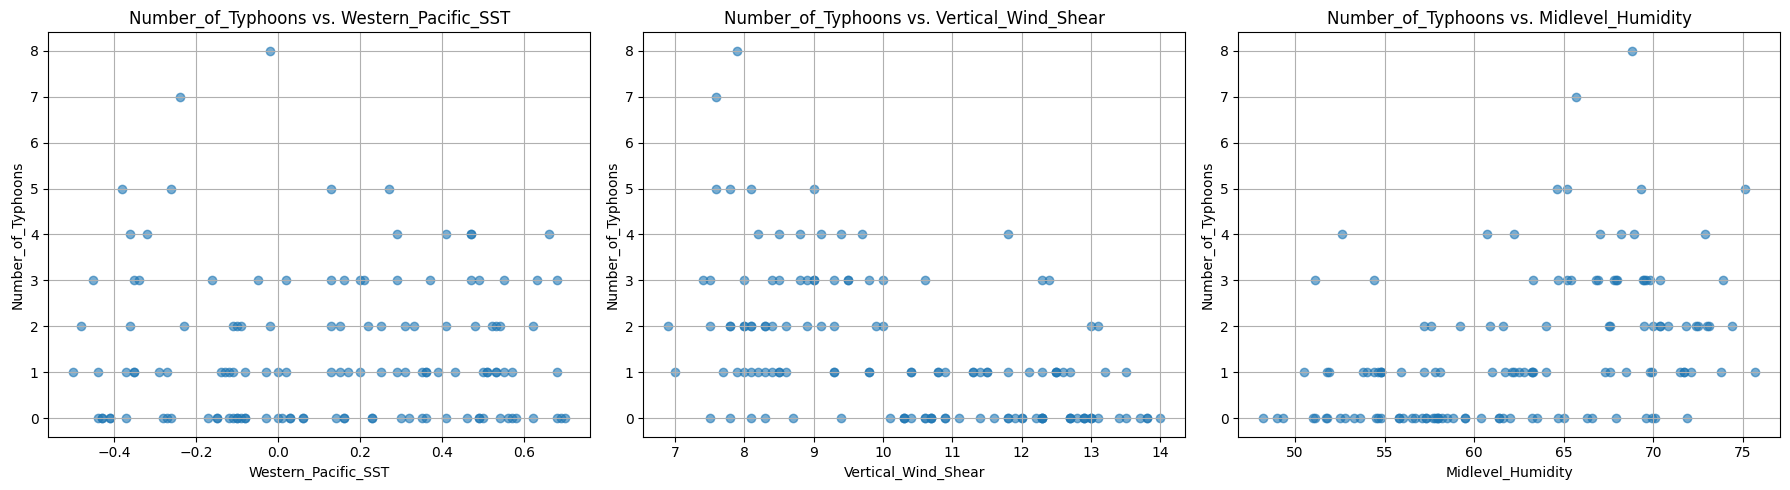

In [ ]:
# --- 3. Create and Save Scatter Diagrams ---
print("Generating scatter plots...")
plt.figure(figsize=(18, 5))

for i, iv in enumerate(independent_vars_all):
    plt.subplot(1, 3, i + 1)
    plt.scatter(df[iv], df[dependent_var], alpha=0.6)
    plt.title(f'{dependent_var} vs. {iv}')
    plt.xlabel(iv)
    plt.ylabel(dependent_var)
    plt.grid(True)

plt.tight_layout()
plt.savefig('typhoon_scatter_plots.png')
plt.show()
plt.close()

In [5]:
# --- 4. Construct and Analyze Regression Models ---
print("\n--- Building and Evaluating Regression Models ---")

models_to_run = {
    'Model 1 (All IVs)': ['Western_Pacific_SST', 'Vertical_Wind_Shear', 'Midlevel_Humidity'],
    'Model 2 (W_Pacific_SST, V_Wind_Shear)': ['Western_Pacific_SST', 'Vertical_Wind_Shear'],
    'Model 3 (W_Pacific_SST, Mid_Humidity)': ['Western_Pacific_SST', 'Midlevel_Humidity'],
    'Model 4 (V_Wind_Shear, Mid_Humidity)': ['Vertical_Wind_Shear', 'Midlevel_Humidity']
}

model_results = {}

for name, ivs in models_to_run.items():
    print(f"\n--- Analyzing {name} ---")
    y = df[dependent_var]
    X = df[ivs]
    X = sm.add_constant(X) # Add the intercept

    model = sm.OLS(y, X).fit()
    model_results[name] = {
        'adj_r_squared': model.rsquared_adj,
        'model_summary': model.summary()
    }
    print(model.summary())



--- Building and Evaluating Regression Models ---

--- Analyzing Model 1 (All IVs) ---
                            OLS Regression Results                            
Dep. Variable:     Number_of_Typhoons   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     15.51
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.16e-08
Time:                        14:46:30   Log-Likelihood:                -226.12
No. Observations:                 132   AIC:                             460.2
Df Residuals:                     128   BIC:                             471.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [6]:
# --- 5. Compare Models and Select the Best One ---
print("\n--- Model Comparison (Adjusted R-squared) ---")
# Find the model with the highest Adjusted R-squared
best_model_name = max(model_results, key=lambda name: model_results[name]['adj_r_squared'])
best_adj_r2 = model_results[best_model_name]['adj_r_squared']

for name, results in model_results.items():
    print(f"{name}: {results['adj_r_squared']:.4f}")

print(f"\nBest Model: {best_model_name} with an Adjusted R-squared of {best_adj_r2:.4f}")




--- Model Comparison (Adjusted R-squared) ---
Model 1 (All IVs): 0.2494
Model 2 (W_Pacific_SST, V_Wind_Shear): 0.2536
Model 3 (W_Pacific_SST, Mid_Humidity): 0.1673
Model 4 (V_Wind_Shear, Mid_Humidity): 0.2528

Best Model: Model 2 (W_Pacific_SST, V_Wind_Shear) with an Adjusted R-squared of 0.2536


In [7]:
# --- 6. Forecast Using the Best Model ---
print("\n--- Forecasting with the Best Model ---")

best_model_ivs = models_to_run[best_model_name]

# Create a new data point for forecasting (using the average values as an example)
new_data_point = df[best_model_ivs].mean().to_dict()
new_data_for_pred = pd.DataFrame([new_data_point])
new_data_for_pred = sm.add_constant(new_data_for_pred, has_constant='add')


print("Forecasting for new data point (using mean values):")
print(new_data_point)

# Re-fit the best model to make the prediction
y = df[dependent_var]
X = sm.add_constant(df[best_model_ivs])
best_model_fit = sm.OLS(y, X).fit()

prediction = best_model_fit.predict(new_data_for_pred)

print(f"\nPredicted Number of Typhoons: {prediction.iloc[0]:.4f}")
print("This means that for a month with average environmental conditions from your dataset,")
print("the model predicts this number of typhoons.")



--- Forecasting with the Best Model ---
Forecasting for new data point (using mean values):
{'Western_Pacific_SST': 0.12825757575757576, 'Vertical_Wind_Shear': 10.303787878787878}

Predicted Number of Typhoons: 1.4167
This means that for a month with average environmental conditions from your dataset,
the model predicts this number of typhoons.
